# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

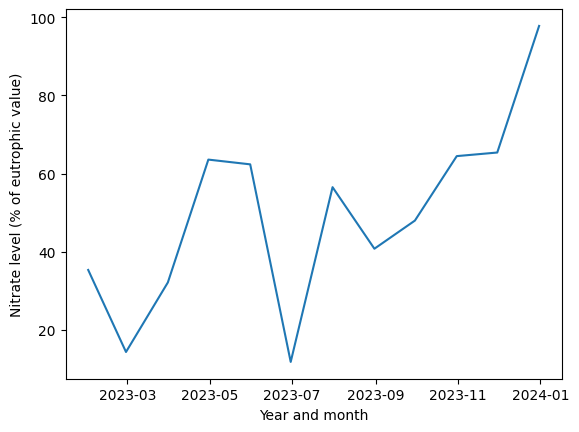

In [3]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

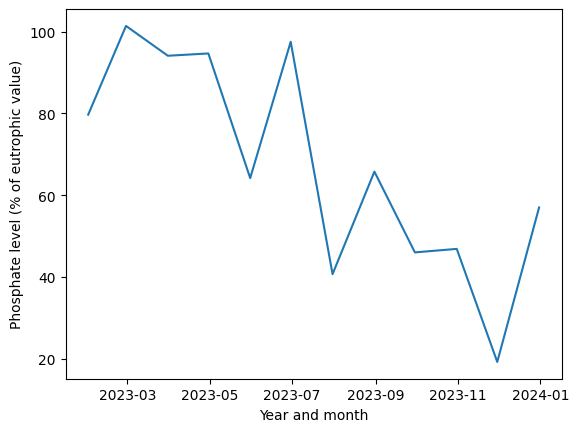

In [5]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

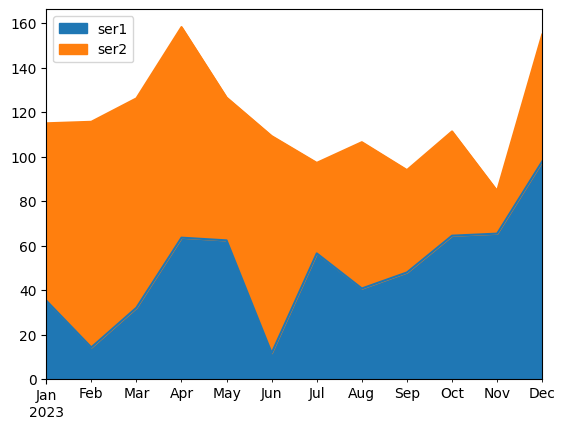

In [6]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

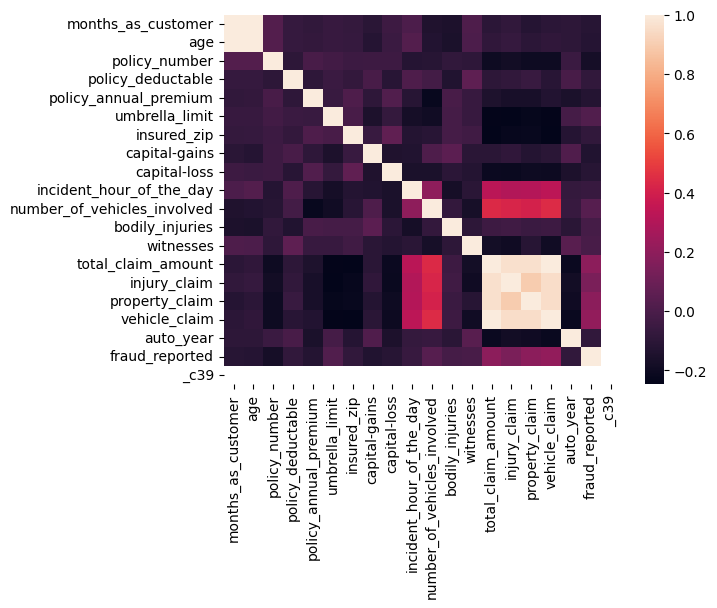

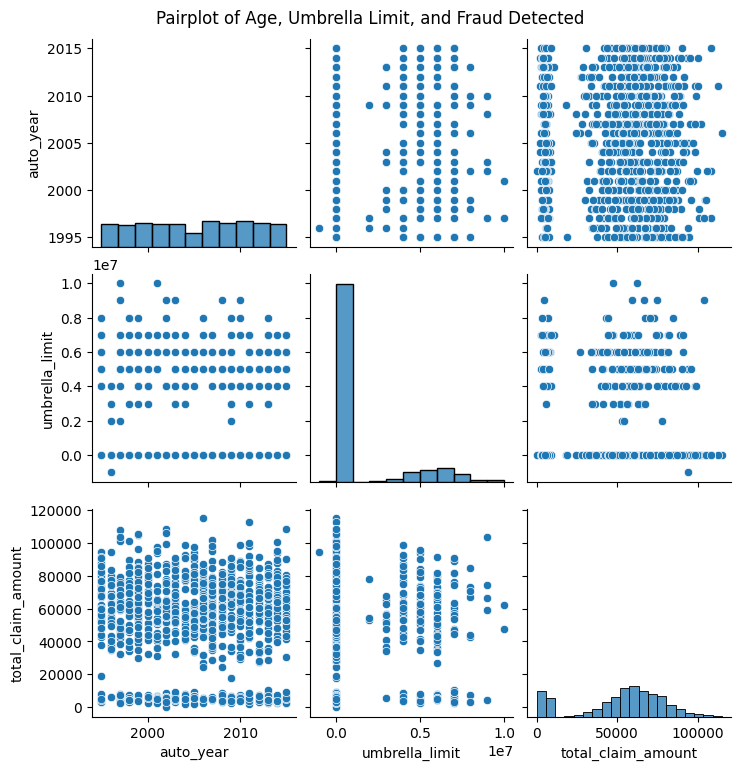


Outliers detected:
auto_year               0
umbrella_limit        202
total_claim_amount      1
dtype: int64

Highly correlated variables:
[                             months_as_customer    age  policy_number  \
months_as_customer                        False   True          False   
age                                        True  False          False   
policy_number                             False  False          False   
policy_deductable                         False  False          False   
policy_annual_premium                     False  False          False   
umbrella_limit                            False  False          False   
insured_zip                               False  False          False   
capital-gains                             False  False          False   
capital-loss                              False  False          False   
incident_hour_of_the_day                  False  False          False   
number_of_vehicles_involved               False  False 

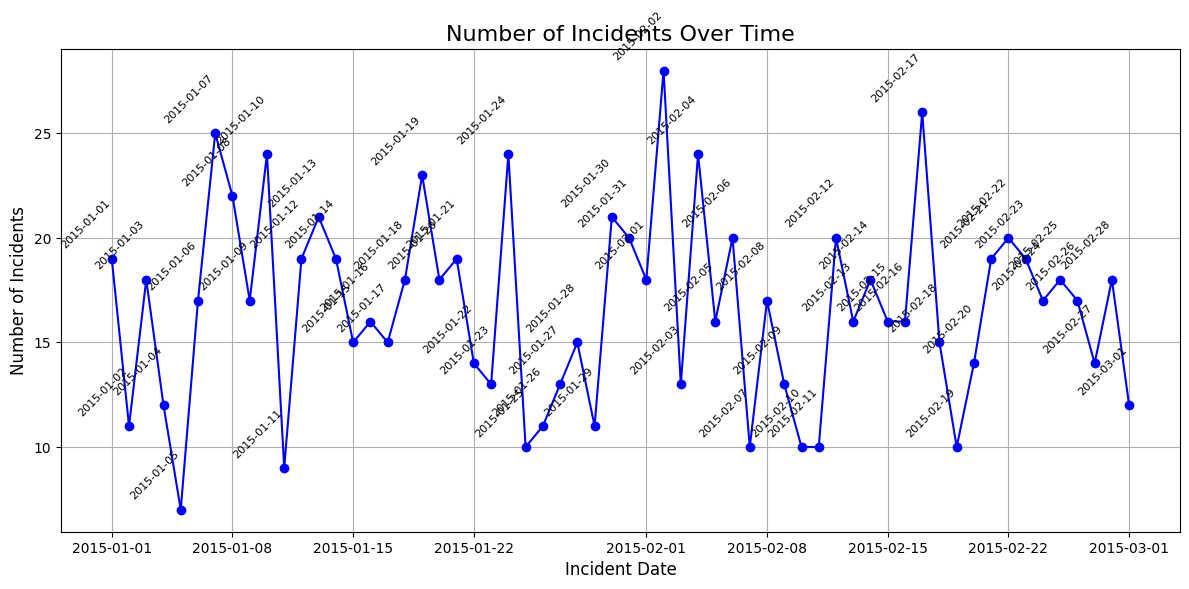

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'insurance_claims_mendeley.csv'
data = pd.read_csv(file_path)
data['fraud_reported'] = data['fraud_reported'].map({'Y': 1, 'N': 0})
correlation_matrix = data.corr(numeric_only=True)
dataplot = sns.heatmap(correlation_matrix.corr(numeric_only=True))
plt.show()

selected_columns = ['auto_year', 'umbrella_limit', 'total_claim_amount']
df = data[selected_columns]


df = df.dropna()

# Create a pairplot
sns.pairplot(df)
plt.suptitle('Pairplot of Age, Umbrella Limit, and Fraud Detected', y=1.02)
plt.show()

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers detected:")
print(outliers)
print("\nHighly correlated variables:")
print([
    ((correlation_matrix > 0.6)) & (correlation_matrix != 1)])

file_path = 'insurance_claims_mendeley.csv'
data = pd.read_csv(file_path)

data['incident_date'] = pd.to_datetime(data['incident_date'])

incident_counts = data.groupby('incident_date').size()

plt.figure(figsize=(12, 6))
plt.plot(incident_counts.index, incident_counts.values, marker='o', linestyle='-', color='b')

for x, y in zip(incident_counts.index, incident_counts.values):
    plt.text(x, y + 0.5, str(x.date()), fontsize=8, rotation=45, ha='right')

plt.title('Number of Incidents Over Time', fontsize=16)
plt.xlabel('Incident Date', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()



- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!
    - Data is what I expected, you can see that there is correlation between all claim amounts and number of vehicles involved. Interestingly time of the incident made an impact on the severity of the claim. Using these newly identified items I can perform an multivariate analysis on if incidents happening on certain date/time is likley to cause more serious injuries and maybe further help correctly price and distribute investigative resources for the users.

- Do you see any outliers?  (Data points that are far from the rest of the data).
    - There was an outlier for umbrella limit, which suggests many primary claimants were not the primary policyholders of the accidents.
- Are any data items highly correlated with each other, suggesting that they are redundant?
    - All claim amount (property, injury, and vehicle) were highly correlated. But I think the distinction is enough to consider them separate factors for the multivariate analysis.
- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?
    - It is interesting to note that more accident happens on Wednesdays which is the middle of the week. I would expect high driving days or movement days like weekends to be more populated wiht accidents. Data shows pretty consistent "pulse" in claim count in a given day of the week.
- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.
    - Another confounding variable I think will make an impact on these numbers is if or if not a DUI was reporeted for the claim.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

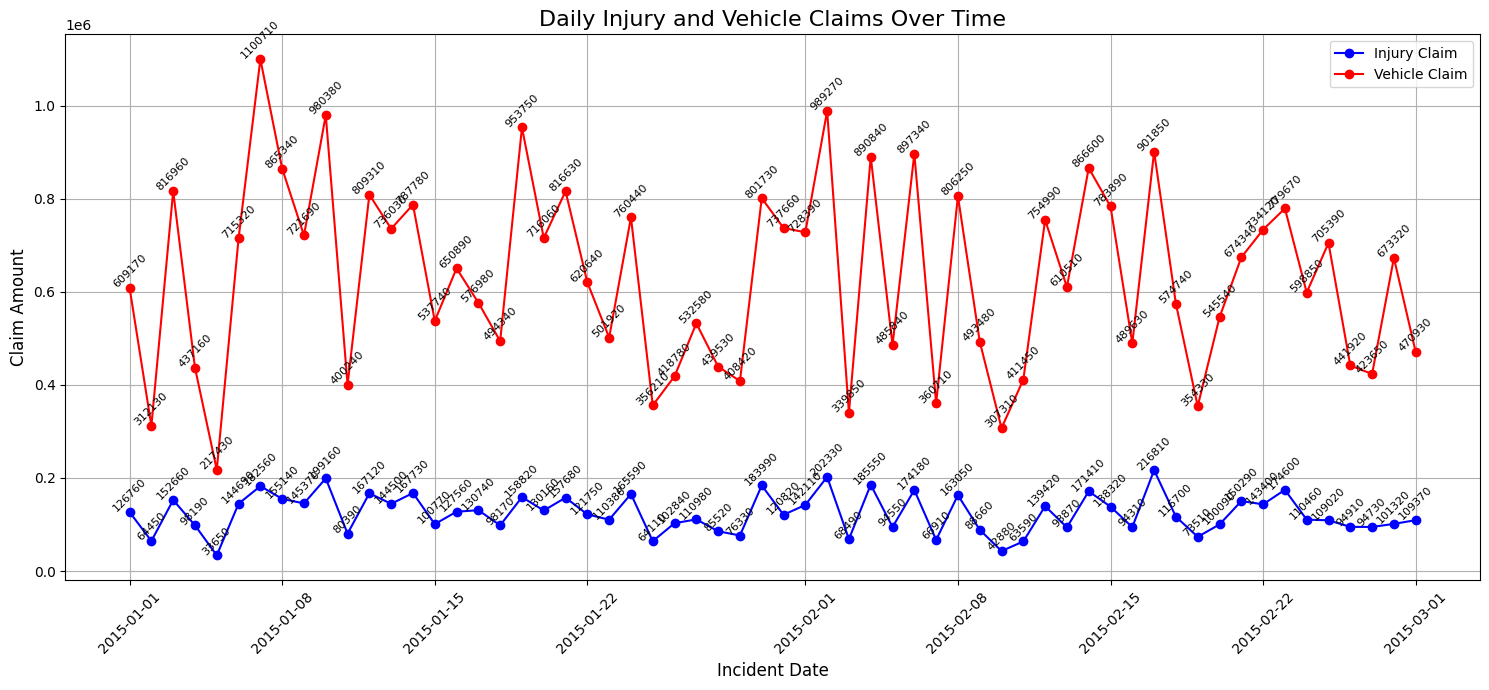

In [ ]:
file_path = 'insurance_claims_mendeley.csv'
data = pd.read_csv(file_path)


data['incident_date'] = pd.to_datetime(data['incident_date'])

daily_data = data.groupby('incident_date').sum()[['injury_claim', 'vehicle_claim']]

daily_data.reset_index(inplace=True)

plt.figure(figsize=(15, 7))
plt.plot(daily_data['incident_date'], daily_data['injury_claim'], marker='o', linestyle='-', label='Injury Claim', color='blue')
plt.plot(daily_data['incident_date'], daily_data['vehicle_claim'], marker='o', linestyle='-', label='Vehicle Claim', color='red')

for x, y in zip(daily_data['incident_date'], daily_data['injury_claim']):
    plt.text(x, y + 500, str(y), fontsize=8, rotation=45, ha='center')
for x, y in zip(daily_data['incident_date'], daily_data['vehicle_claim']):
    plt.text(x, y + 500, str(y), fontsize=8, rotation=45, ha='center')

plt.title('Daily Injury and Vehicle Claims Over Time', fontsize=16)
plt.xlabel('Incident Date', fontsize=12)
plt.ylabel('Claim Amount', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
